In [2]:
import math 
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math
InteractiveShell.ast_node_interactivity = 'all'

/tmp/ipykernel_4009/3124847320.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Einstein Solids Entropy

In [115]:
def macro(N, q):
    return math.factorial(N+q-1)/(math.factorial(q)*math.factorial(N-1))

def func(Na, Nb, qtotes, evalk):
    
    qa = []
    qb = []
    
    for i in range(qtotes + 1):
        qa.append(i)
        qb.append(qtotes - i)
    
    Aomega = []
    Bomega = []
    Stotes = []
    stotes = []
    
    for i in range(len(qa)):
        Aomega.append(macro(Na, qa[i]))
        Bomega.append(macro(Nb, qb[i]))

        if evalk == 1:
            k = 1.380649E-23
            x = k*np.log(Aomega[i]*Bomega[i])
            x = np.format_float_scientific(x, precision = 3)
            Stotes.append(x)
        elif evalk == 0:
            x = np.log(Aomega[i]*Bomega[i])
            x = str(np.format_float_scientific(x, precision = 3))
            Stotes.append("k*" + x)
        k = 1.380649E-23
        x = Aomega[i]*Bomega[i]
        stotes.append(x)

    return qa, qb, Aomega, Bomega, Stotes, stotes

In [122]:
Na = 20
Nb = 20
qtotes = 75
evalk = 1
k = 1.380649E-23


qa, qb, Aomega, Bomega, Stotes, stotes = func(Na, Nb, qtotes, evalk)

df = pd.DataFrame({
    "qA": qa,
    "qB": qb,
    "\u03A9A": Aomega,
    "\u03A9B": Bomega,
    "S total": Stotes
})
df.style \
  .format(precision=0, thousands=",", decimal=".") \
  .format_index(axis=1) \
  .hide(axis="index")

qA,qB,ΩA,ΩB,S total
0,75,1,"36,030,431,772,522,504,192",6.217e-22
1,74,20,"28,747,684,924,884,975,616",6.6e-22
2,73,210,"22,874,501,983,241,809,920",6.893e-22
3,72,"1,540","18,150,420,051,920,130,048",7.136e-22
4,71,"8,855","14,360,771,909,211,531,264",7.345e-22
5,70,"42,504","11,329,053,395,044,653,056",7.529e-22
6,69,"177,100","8,910,491,434,304,783,360",7.693e-22
7,68,"657,800","6,986,635,329,170,796,544",7.840e-22
8,67,"2,220,075","5,460,818,418,202,461,184",7.974e-22
9,66,"6,906,900","4,254,358,535,111,219,712",8.096e-22


<BarContainer object of 76 artists>

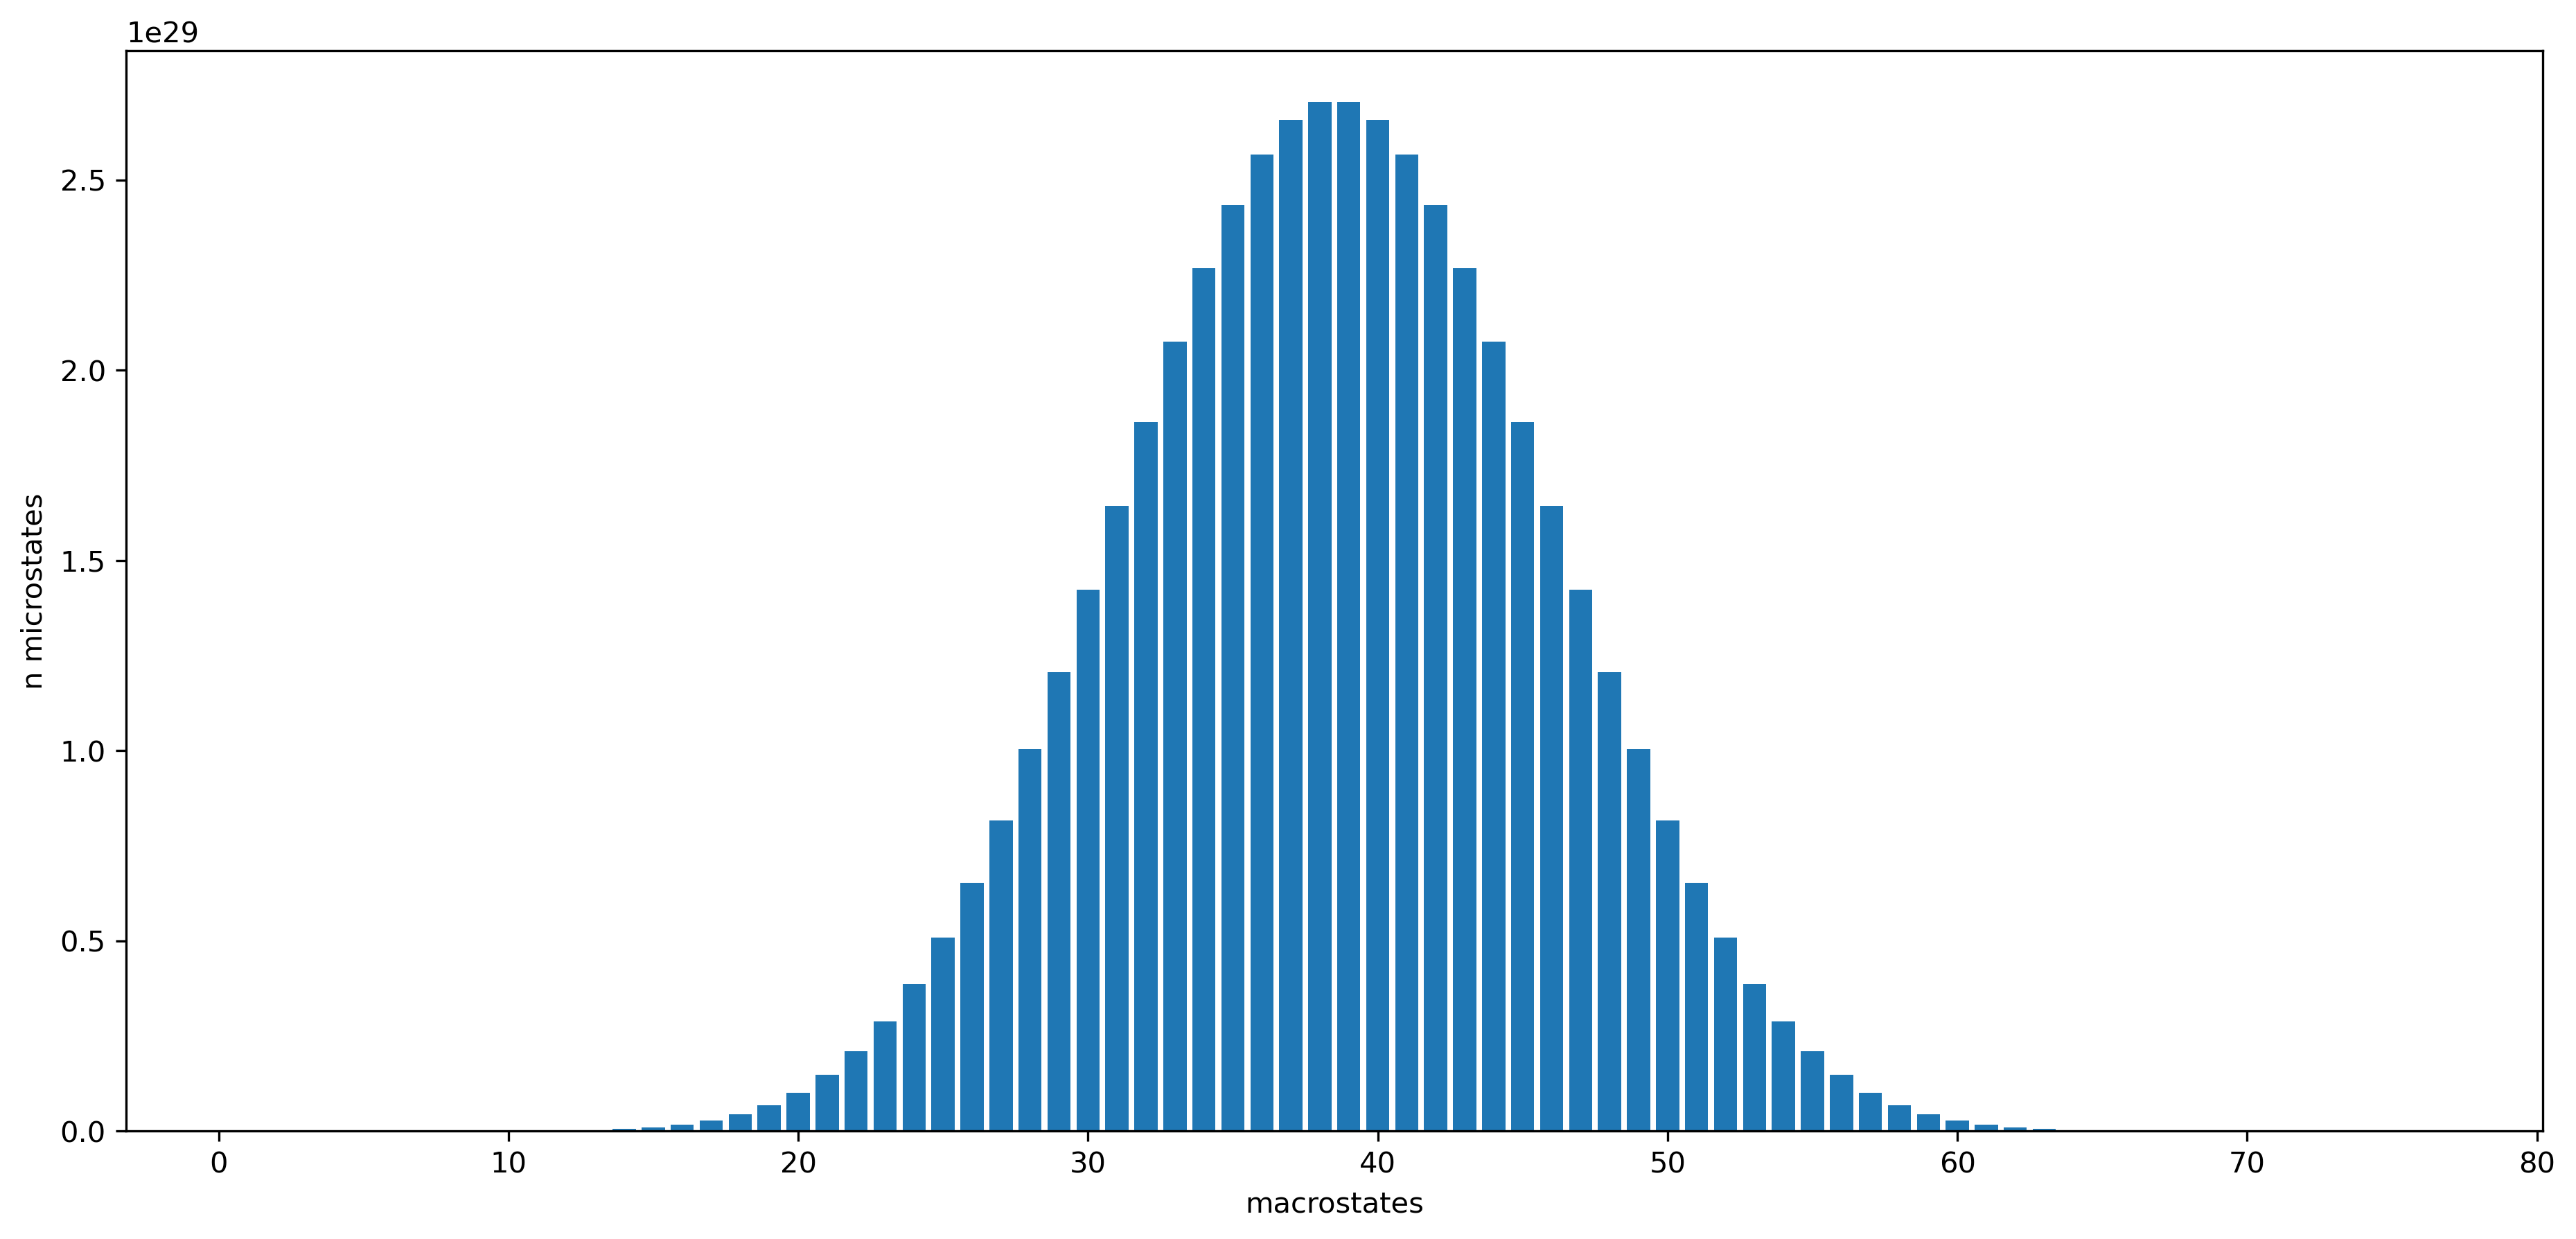

In [123]:
z = 0
for i in stotes: z+=i
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 1, 1, xlabel='macrostates', ylabel='n microstates')
ax0.bar(range(1,len(stotes)+1), stotes)
#ax0.set_xticks(np.arange(1,len(stotes)+1))

# Student / Table Markov Chain

In [134]:
A = np.matrix([[1/3, 1/3, 0, 0, 0, 1/3],
              [1/3, 1/3, 1/3, 0, 0, 0],
              [0, 1/3, 1/3, 1/3, 0, 0],
              [0, 0, 1/3, 1/3, 1/3, 0],
              [0, 0, 0, 1/3, 1/3, 1/3],
              [1/3, 0, 0, 0, 1/3, 1/3]])
A**99

matrix([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667]])

# Random Table Change Simulation

In [160]:
def seat_change(peeps, tables, nrolls):
    tally = np.zeros(len(peeps)+1)
    for n in range(nrolls):
        rints = rng.integers(low=0, high=3, size=len(peeps)) # ROLLS FOR SEAT CHANGE

        j = 0
        for i in rints:
            if i == 0:
                pass
            if i == 1:
                peeps[j] = (peeps[j] - 1) % tables
            if i == 2:
                peeps[j] = (peeps[j] + 1) % tables
            j+=1
        table_distrubution = [0] * tables
        for i in peeps:
            table_distrubution[i] += 1
        for i in table_distrubution:
            tally[i] += 1
    
    table_distrubution = [0] * tables
    for i in peeps:
        table_distrubution[i] += 1
    
    return peeps, table_distrubution, tally

In [161]:
rng = np.random.default_rng() # INITIALIZE ONCE
                              # SETS TABLES WITH RANDOM DISTRIBUTION
tables = 6
peeps = rng.integers(low=0, high=tables, size=18)
peeps

array([2, 0, 4, 2, 4, 5, 4, 1, 5, 4, 4, 4, 4, 3, 3, 3, 4, 0])

In [162]:
peeps, table_distrubution, tally = seat_change(peeps, tables, 99999)
peeps
table_distrubution
tally

array([5, 5, 1, 0, 5, 4, 3, 2, 1, 3, 1, 5, 1, 4, 0, 2, 3, 5])

[2, 4, 2, 3, 2, 5]

array([2.23580e+04, 8.11940e+04, 1.38263e+05, 1.47208e+05, 1.10129e+05,
       6.14440e+04, 2.69150e+04, 9.28400e+03, 2.51100e+03, 5.69000e+02,
       9.90000e+01, 1.70000e+01, 1.00000e+00, 2.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

<BarContainer object of 19 artists>

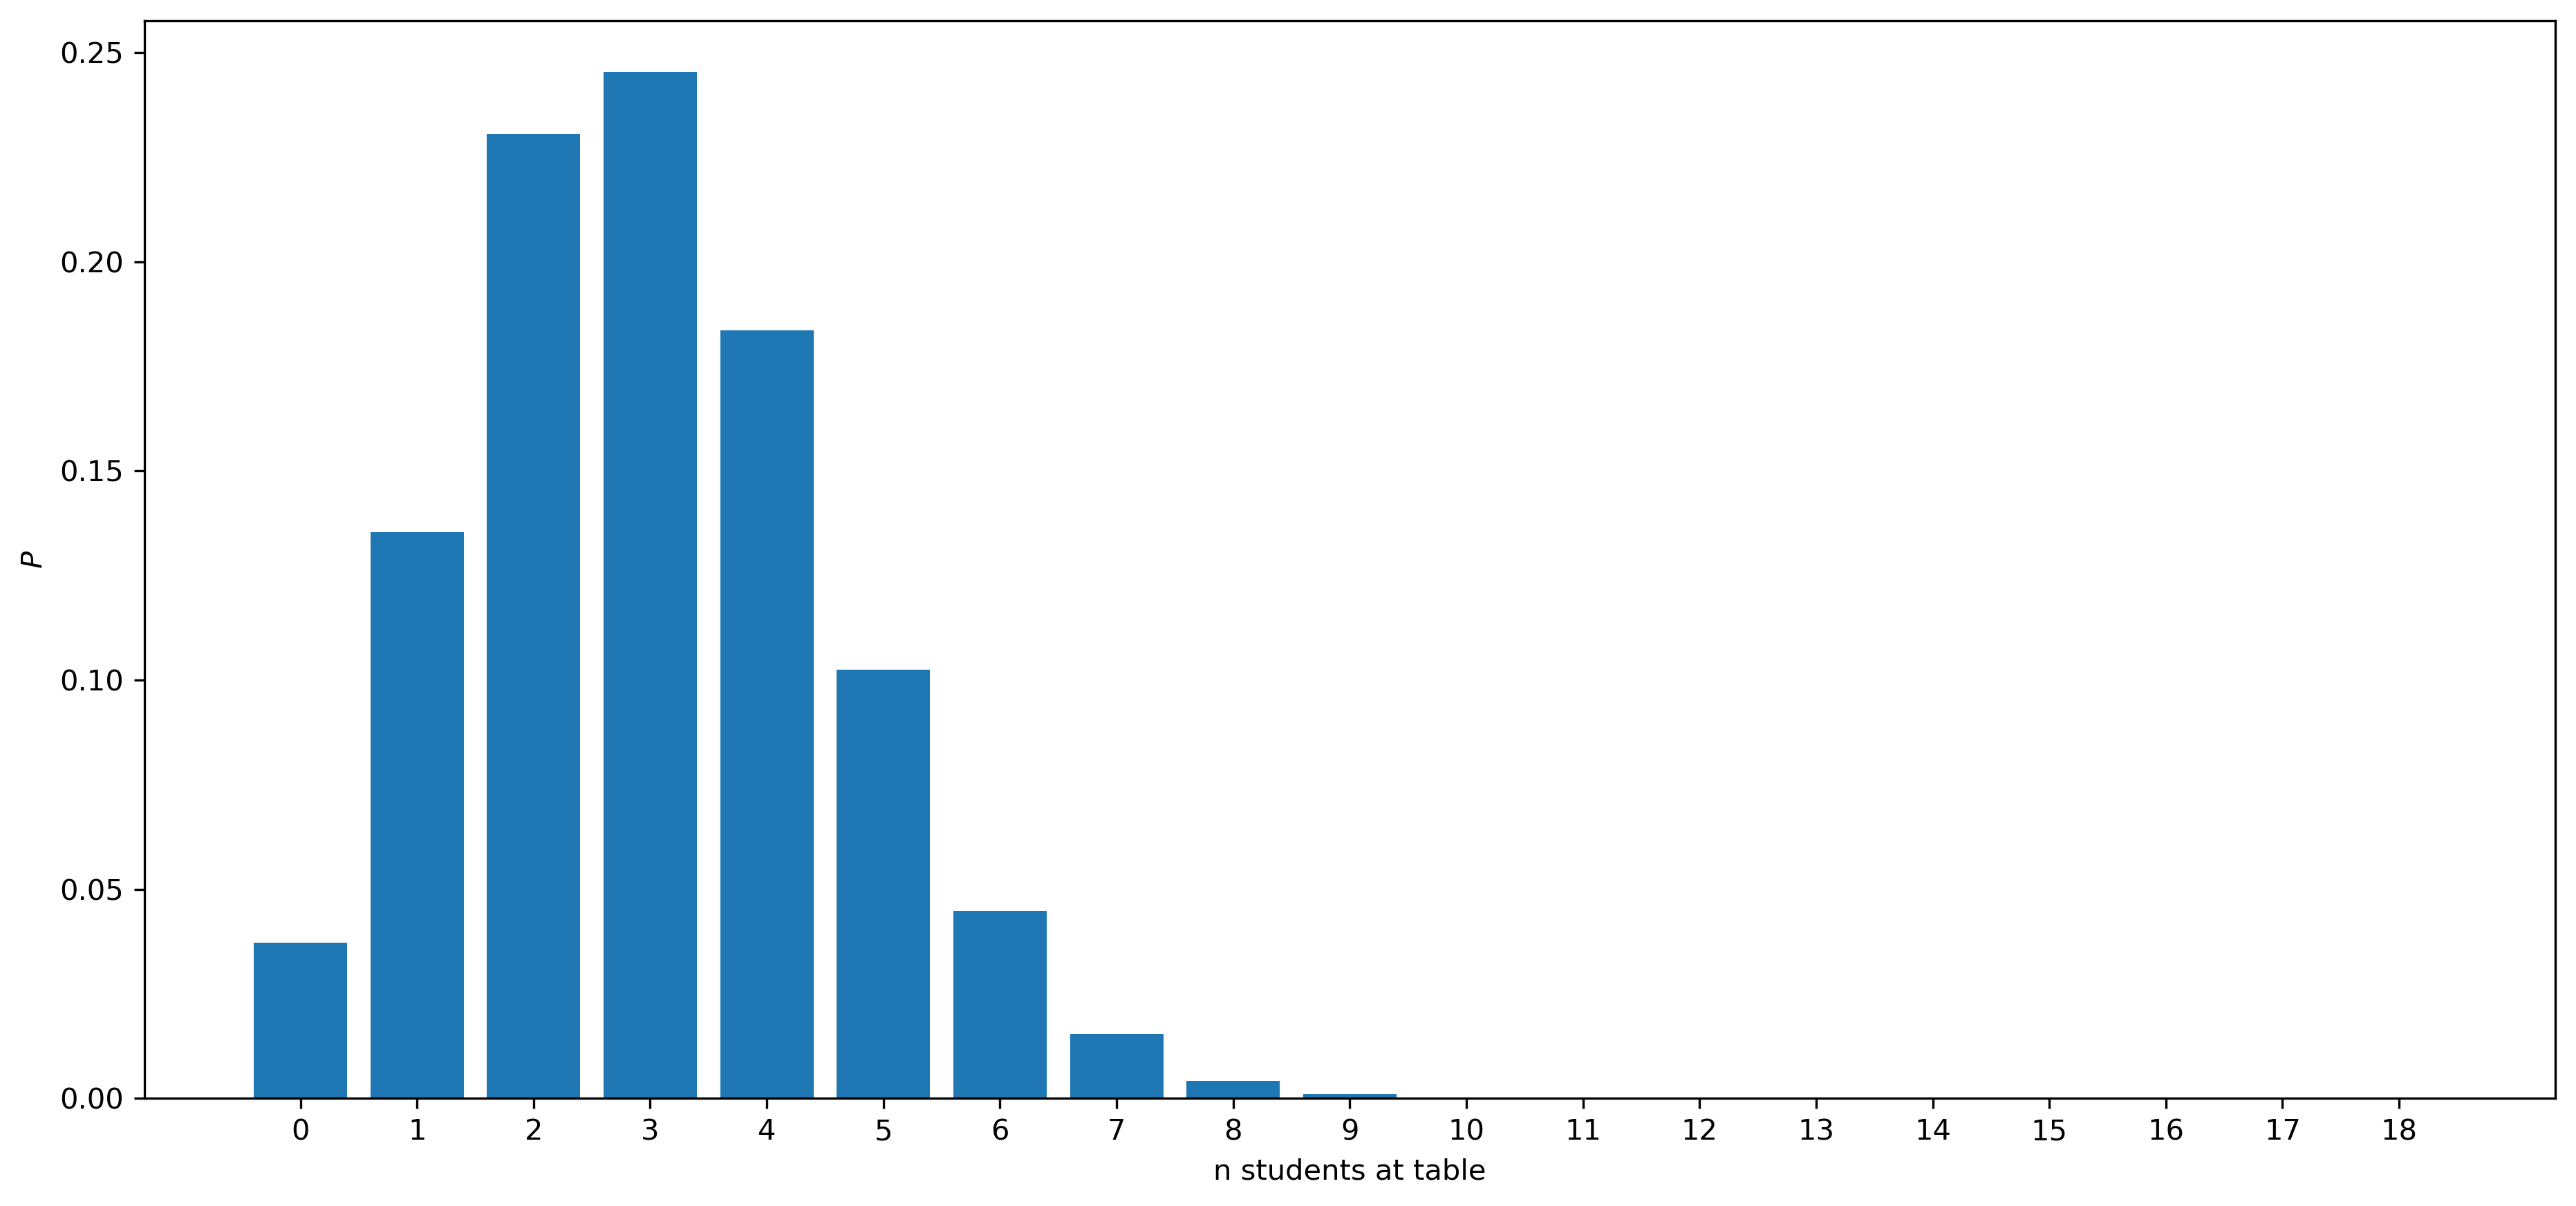

In [163]:
z = 0
for i in tally: z+=i
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 1, 1, xlabel='n students at table', ylabel='$P$')
ax0.bar(range(len(tally)), tally/z)
ax0.set_xticks(np.arange(len(tally)))

There is more than one microstate that is comprised of three students at the same table with these parameters.

Beginning list of what table each student is at indexed by student


array([16, 10, 13,  9, 14,  9, 13, 10, 16,  1, 16,  5,  9,  2,  1,  1, 12,
        9, 10,  7, 16,  9, 13,  6,  2,  2, 16,  5, 18,  4, 16, 10, 12, 15,
        6, 14, 16, 19,  9,  7,  4,  1, 12,  9, 11,  5,  0,  0, 12, 13,  3,
       15,  7, 17, 10,  8,  6,  6,  9,  3, 15,  1,  6, 18, 14, 18,  6, 12,
        9,  6, 17, 18,  5,  1,  6,  2,  8, 17,  8, 10,  7, 15, 14,  4,  6,
        5, 18, 13,  5,  3, 16,  1, 11, 12,  2,  7, 17, 19,  0, 12])

Ending list of what table each student is at indexed by student


array([ 5, 12, 10, 18,  9,  5,  3, 10,  5, 11, 10,  9,  7, 19,  9,  2,  8,
       12,  4,  9, 15,  4, 11,  4, 14, 14,  4, 17,  6,  3,  2,  1, 18, 18,
       13, 13, 15, 10,  8, 16,  4, 16, 14,  7,  6,  9, 14, 18,  3, 15, 10,
        2,  0,  9, 16,  7, 14, 17, 15,  0,  5,  8,  3, 12,  7, 19,  3, 18,
       11, 14, 17, 14,  9, 10, 19, 19,  5,  4, 14,  2, 16,  6,  0, 12,  6,
        2,  7, 14,  0, 19, 13, 15,  6,  4,  3,  1,  7,  4, 11,  0])

Number of students at each table, where the indexed by table


[5, 2, 5, 6, 8, 5, 5, 6, 3, 7, 6, 4, 4, 3, 9, 5, 4, 3, 5, 5]

Probability distrobution for number of students at a given table


array([1.17280e+04, 6.23710e+04, 1.62075e+05, 2.79360e+05, 3.55847e+05,
       3.60719e+05, 3.00254e+05, 2.12030e+05, 1.29749e+05, 6.96010e+04,
       3.33770e+04, 1.42670e+04, 5.63000e+03, 2.05400e+03, 6.53000e+02,
       1.95000e+02, 5.30000e+01, 1.10000e+01, 4.00000e+00, 2.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

<BarContainer object of 101 artists>

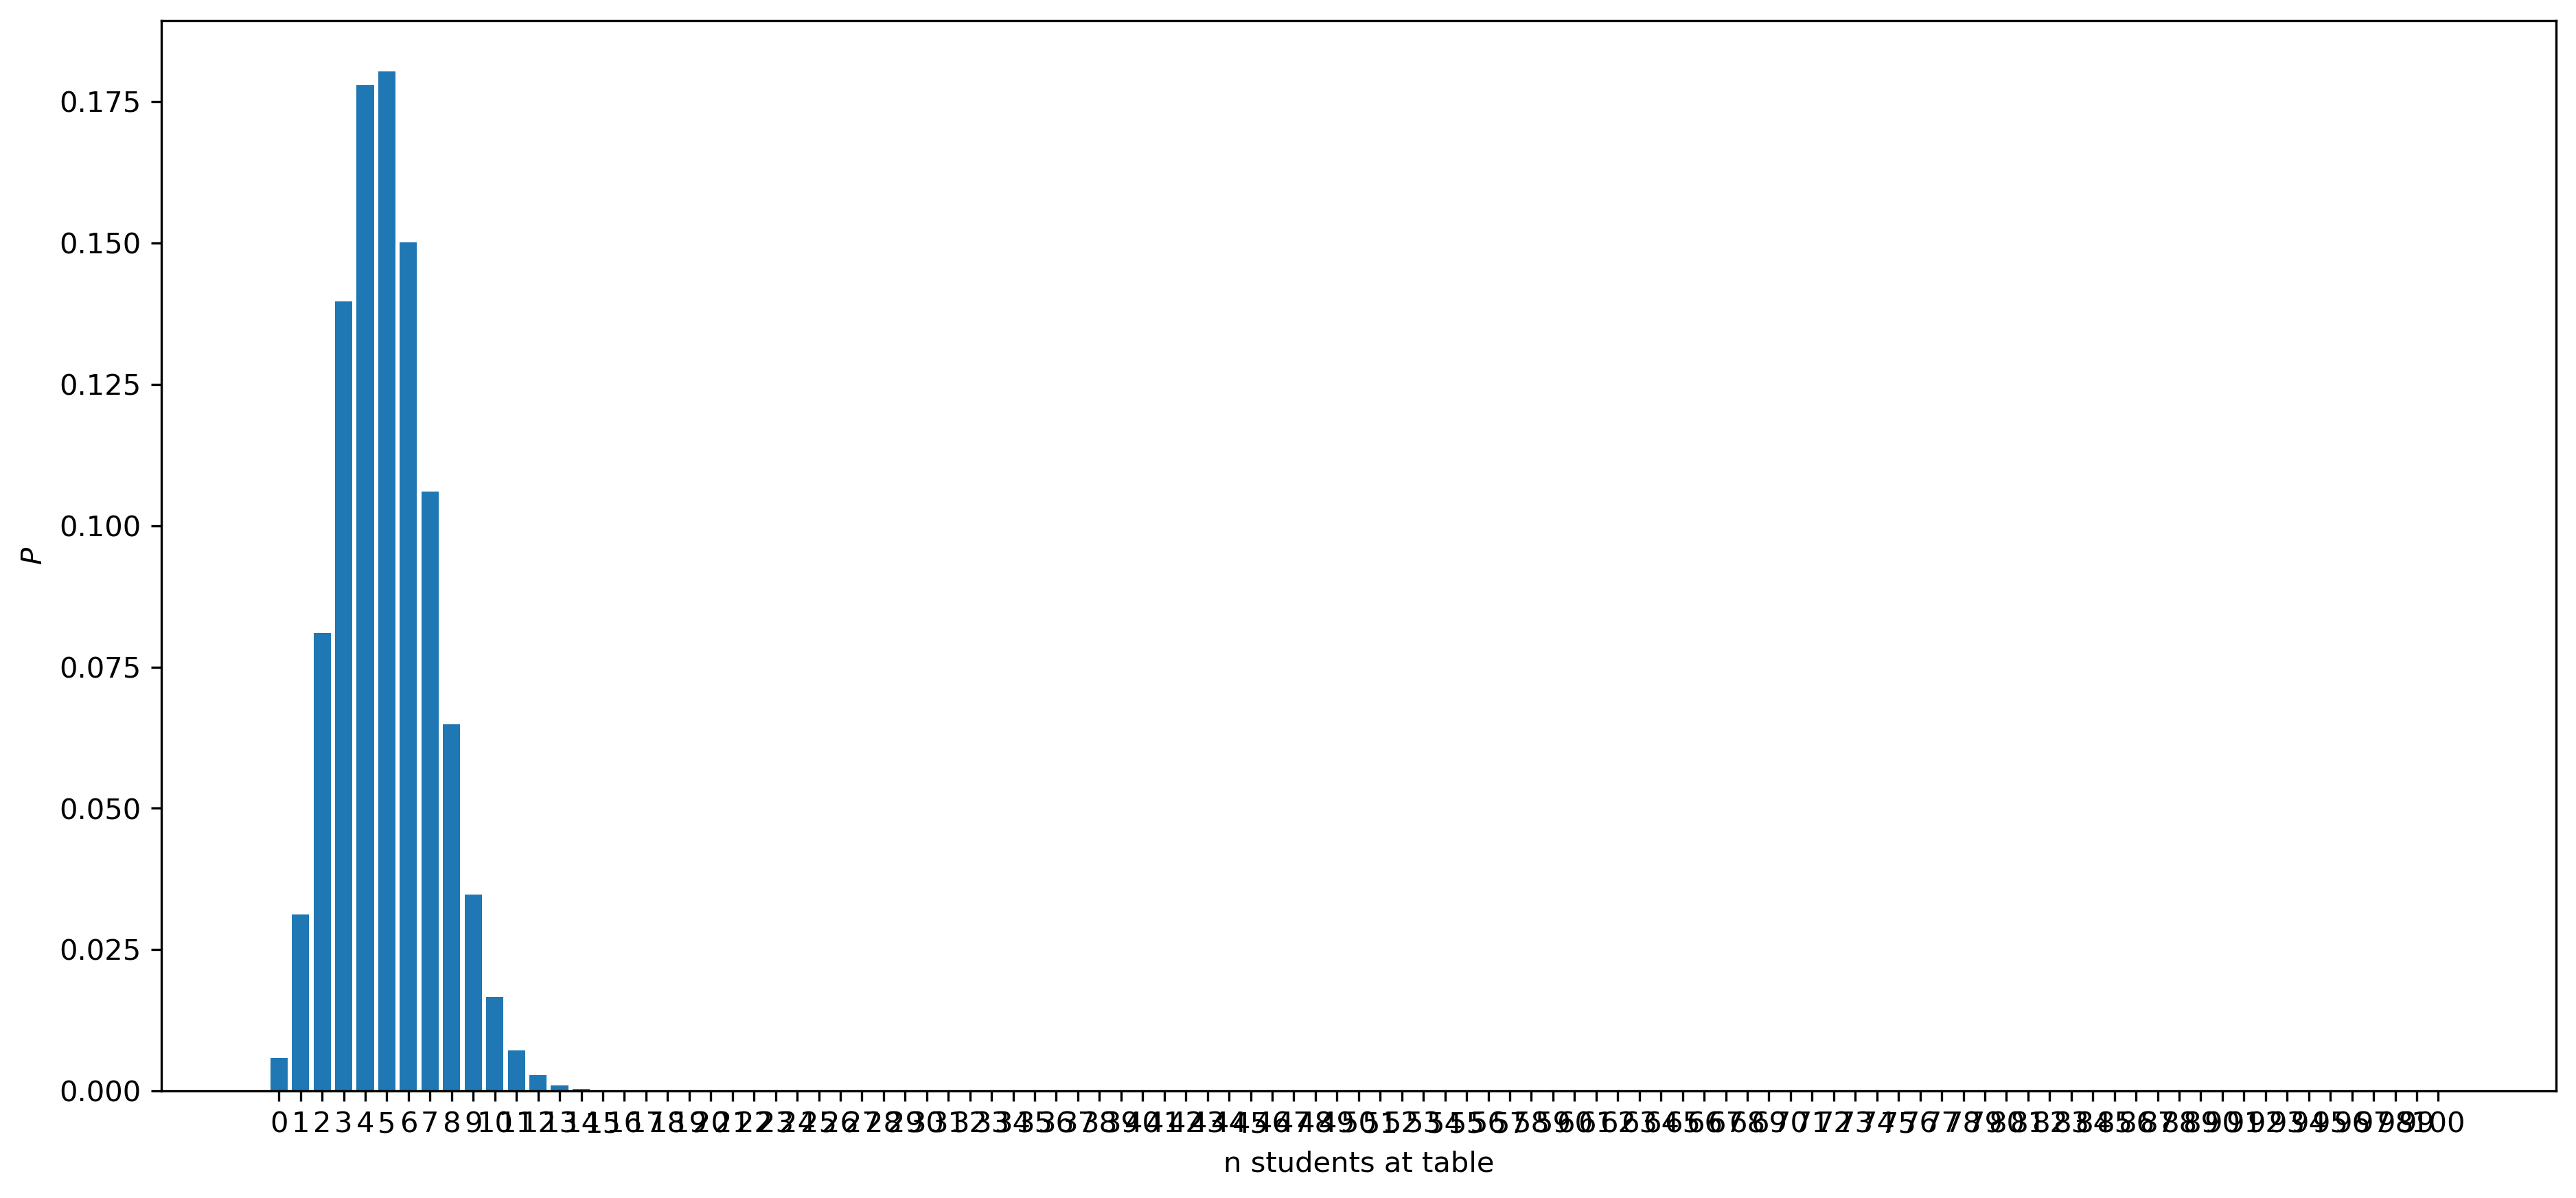

In [171]:
rng = np.random.default_rng() # INITIALIZE ONCE
                              # SETS TABLES WITH RANDOM DISTRIBUTION
tables = 20
peeps = rng.integers(low=0, high=tables, size=100)
print('Beginning list of what table each student is at indexed by student')
peeps
peeps, table_distrubution, tally = seat_change(peeps, tables, 99999)
print('Ending list of what table each student is at indexed by student')
peeps
print('Number of students at each table, where the indexed by table')
table_distrubution
print('Probability distrobution for number of students at a given table')
tally
z = 0
for i in tally: z+=i
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 1, 1, xlabel='n students at table', ylabel='$P$')
ax0.bar(range(len(tally)), tally/z)
ax0.set_xticks(np.arange(len(tally)))